In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter('ignore')

C:\Users\Admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
user = pd.read_csv("User.csv")
period = pd.read_csv("Period.csv")
symt = pd.read_csv("Symptom.csv")

In [4]:
user.head()

,id,dob,cycle_length_initial,period_length_initial
0,252,NaN,28,6
1,253,NaN,30,5
2,254,NaN,28,6
3,255,NaN,30,4
4,256,NaN,25,6


In [17]:
len(user['id'].unique())

6729

In [15]:
len(user['dob'])

6729

In [14]:
user['dob'].isnull().sum()

6289

In [6]:
period.head()

,id,start_date,end_date,User_id
0,352,5/4/15,10/4/15,252
1,353,23/3/15,27/3/15,253
2,354,6/4/15,11/4/15,254
3,355,21/3/15,24/3/15,255
4,356,26/3/15,31/3/15,256


In [35]:
len(period['id'])

34942

In [22]:
len(period['User_id'].unique())

6703

In [30]:
symt.head()

,id,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
0,127,252,0,0,0,0,0,0,0,0,0,0,11/4/15
1,128,257,0,0,0,46,0,0,0,0,0,0,10/4/15
2,129,257,0,0,0,0,0,27,48,0,0,0,11/4/15
3,130,263,0,0,0,0,0,0,0,0,0,0,11/4/15
4,132,269,0,0,0,0,0,0,0,0,0,0,11/4/15


In [34]:
len(symt['user_id'].unique())

3953

In [38]:
up = pd.merge(user, period, left_on='id',right_on='User_id')

In [40]:
up.head()

,id_x,dob,cycle_length_initial,period_length_initial,id_y,start_date,end_date,User_id
0,252,NaN,28,6,352,5/4/15,10/4/15,252
1,253,NaN,30,5,353,23/3/15,27/3/15,253
2,254,NaN,28,6,354,6/4/15,11/4/15,254
3,254,NaN,28,6,1769,4/10/15,NaN,254
4,254,NaN,28,6,4274,1/1/16,NaN,254


In [136]:
symt[symt.user_id == 278]

,id,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
12,140,278,0,0,0,0,0,0,0,0,0,0,12/4/15
20,151,278,0,20,15,0,0,17,15,0,0,0,14/4/15
116,270,278,0,0,0,24,39,59,55,0,49,0,2/9/15
715,874,278,0,26,0,66,0,41,0,52,27,41,30/10/15
744,904,278,0,0,0,50,0,0,0,23,0,11,1/11/15
2828,3002,278,0,21,0,44,47,22,41,0,42,0,12/3/16
7593,7802,278,0,0,0,0,0,0,0,0,0,0,23/2/17
8886,9099,278,0,0,0,50,0,28,33,0,23,0,21/7/17
13253,13474,278,36,0,27,38,0,0,0,0,0,0,24/1/19
13467,13688,278,0,28,0,42,0,37,54,0,0,13,13/3/19


In [138]:
up[up.id_x == 254]

,id_x,dob,cycle_length_initial,period_length_initial,id_y,start_date,end_date,User_id
2,254,NaN,28,6,354,6/4/15,11/4/15,254
3,254,NaN,28,6,1769,4/10/15,NaN,254
4,254,NaN,28,6,4274,1/1/16,NaN,254
5,254,NaN,28,6,5210,27/1/16,NaN,254
6,254,NaN,28,6,8289,24/4/16,29/4/16,254
7,254,NaN,28,6,11682,22/6/16,27/6/16,254
8,254,NaN,28,6,11683,23/7/16,NaN,254


2774

In [142]:
up.drop(['dob','User_id'],axis=1)

,id_x,cycle_length_initial,period_length_initial,id_y,start_date,end_date
0,252,28,6,352,5/4/15,10/4/15
1,253,30,5,353,23/3/15,27/3/15
2,254,28,6,354,6/4/15,11/4/15
3,254,28,6,1769,4/10/15,NaN
4,254,28,6,4274,1/1/16,NaN
5,254,28,6,5210,27/1/16,NaN
6,254,28,6,8289,24/4/16,29/4/16
7,254,28,6,11682,22/6/16,27/6/16
8,254,28,6,11683,23/7/16,NaN
9,255,30,4,355,21/3/15,24/3/15


In [47]:
len(symt),len(up)

(13512, 34942)

In [45]:
len(pd.merge(up, symt, left_on='id_y',right_on='id'))

11753

In [50]:
len(symt.id),len(symt.id.unique())

(13512, 13512)

In [53]:
len(up.id_y),len(up.id_y.unique())

(34942, 34942)

In [120]:
ups = pd.merge(up, symt, left_on='id_y',right_on='user_id')
ups.head(9)

,id_x,dob,cycle_length_initial,period_length_initial,id_y,start_date,end_date,User_id,id,user_id,...,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
0,254,NaN,28,6,1769,4/10/15,NaN,254,1680,1769,...,57,57,19,53,0,60,100,44,0,29/12/15
1,254,NaN,28,6,1769,4/10/15,NaN,254,1763,1769,...,61,0,39,0,0,0,33,65,0,4/1/16
2,254,NaN,28,6,1769,4/10/15,NaN,254,1764,1769,...,63,65,64,55,0,0,97,20,0,30/12/15
3,254,NaN,28,6,1769,4/10/15,NaN,254,1765,1769,...,73,65,49,57,0,0,77,12,0,31/12/15
4,254,NaN,28,6,1769,4/10/15,NaN,254,1766,1769,...,71,0,33,0,0,0,99,0,0,1/1/16
5,254,NaN,28,6,1769,4/10/15,NaN,254,1767,1769,...,31,0,53,28,0,0,0,0,0,2/1/16
6,254,NaN,28,6,1769,4/10/15,NaN,254,1768,1769,...,54,0,0,0,52,0,32,0,0,3/1/16
7,254,NaN,28,6,1769,4/10/15,NaN,254,2705,1769,...,0,0,0,0,0,0,0,0,0,22/2/16
8,254,NaN,28,6,5210,27/1/16,NaN,254,8635,5210,...,0,0,0,0,0,0,0,0,0,22/5/17


In [119]:
len(ups.id_x.unique())

3798

In [77]:
filtered = ups.drop(['User_id', 'id','dob'], axis=1)

In [78]:
filtered.head()

,id_x,cycle_length_initial,period_length_initial,id_y,start_date,end_date,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
0,252,28,6,352,5/4/15,10/4/15,581,0,0,39,54,45,0,0,14,0,0,11/9/15
1,253,30,5,353,23/3/15,27/3/15,591,0,0,0,0,0,0,0,0,0,55,12/9/15
2,254,28,6,354,6/4/15,11/4/15,587,0,0,0,0,0,0,0,16,0,0,12/9/15
3,254,28,6,1769,4/10/15,NaN,1718,27,0,0,0,0,0,0,0,0,100,4/1/16
4,254,28,6,4274,1/1/16,NaN,3284,0,0,0,0,0,0,0,0,0,0,24/5/16


In [81]:
filtered.end_date.isnull().sum()

867

In [82]:
filtered.start_date.isnull().sum()

3

In [83]:
len(filtered)

11753

In [87]:
filtered[filtered['id_x'] == 252]

,id_x,cycle_length_initial,period_length_initial,id_y,start_date,end_date,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
0,252,28,6,352,5/4/15,10/4/15,581,0,0,39,54,45,0,0,14,0,0,11/9/15


In [146]:
symt[symt.user_id == 257]

,id,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
1,128,257,0,0,0,46,0,0,0,0,0,0,10/4/15
2,129,257,0,0,0,0,0,27,48,0,0,0,11/4/15
11,139,257,0,0,0,0,0,0,47,0,0,0,12/4/15


In [526]:
up_sorted = up.sort_values(by='start_date')

In [527]:
up_dup = up_sorted

In [528]:
up_dup.start_date = up_sorted['start_date'].str.replace('/','-')
up_dup.end_date = up_sorted['end_date'].str.replace('/','-')

In [529]:
up_dup = up_dup[5:-3]

In [530]:
up_dup.drop(['dob','User_id'],axis=1,inplace=True)

In [531]:
up_dup = up_dup[5:]

In [532]:
mean_dur = round(up_dup.period_length_initial.mean())
mean_dur

6

In [533]:
up_dup.end_date = up_dup.end_date.fillna('None')

In [534]:
up_dup = up_dup.reset_index(drop=True)
up_dup.head(5)

,id_x,cycle_length_initial,period_length_initial,id_y,start_date,end_date
0,2215,28,6,5364,1-1-16,6-1-16
1,1810,28,4,4315,1-1-16,3-1-16
2,1514,28,5,4180,1-1-16,5-1-16
3,1920,28,6,4491,1-1-16,6-1-16
4,2724,28,2,7141,1-1-16,8-1-16


In [535]:
import time
t1=time.time()
l1 = [1,3,5,7,8,10,12]
l2 = [4,6,9,11]
for num,value in enumerate(up_dup.end_date):
    if(up_dup.end_date[num] == 'None'):
        date = up_dup.start_date[num].split('-')
        print(date)
        dpr = int(date[0])+mean_dur
        month = int(date[1])
        year = int(date[2])
        if(month == 2):
            if(dpr > 28):
                dpr = dpr-28
                month = int(date[1])+1
                if(month>12):
                    month = 1
                    year = int(date[2])+1
            up_dup.end_date[num] = str(dpr)+'-'+str(month)+'-'+str(year)     
        elif(month in l1):
            if(dpr > 31):
                dpr = dpr-31
                month = int(date[1])+1
                if(month>12):
                    month = 1
                    year = int(date[2])+1
            up_dup.end_date[num] = str(dpr)+'-'+str(month)+'-'+str(year)
        else:
            if(dpr > 30):
                dpr = dpr-30
                month = int(date[1])+1
                if(month>12):
                    month = 1
                    year = int(date[2])+1
            up_dup.end_date[num] = str(dpr)+'-'+str(month)+'-'+str(year)

t2 = time.time()
print("total elapsed time: ",t2-t1)

['1', '1', '16']
['1', '1', '16']
['1', '1', '16']


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


['1', '1', '17']
['1', '1', '18']
['1', '1', '18']
['1', '1', '18']
['1', '1', '19']
['1', '1', '19']
['1', '1', '19']
['1', '10', '15']
['1', '10', '15']
['1', '10', '15']
['1', '10', '16']
['1', '10', '16']
['1', '10', '17']
['1', '10', '17']
['1', '10', '17']
['1', '10', '17']


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


['1', '10', '18']
['1', '11', '15']
['1', '11', '15']
['1', '11', '15']
['1', '11', '16']
['1', '11', '16']
['1', '11', '16']
['1', '11', '17']
['1', '11', '18']
['1', '11', '18']
['1', '12', '15']
['1', '12', '15']
['1', '12', '16']
['1', '12', '16']
['1', '12', '16']
['1', '12', '17']
['1', '12', '17']
['1', '12', '18']
['1', '12', '18']
['1', '12', '18']
['1', '2', '16']
['1', '2', '16']
['1', '2', '17']
['1', '2', '17']


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


['1', '2', '17']
['1', '2', '18']
['1', '2', '18']
['1', '2', '19']
['1', '2', '19']
['1', '2', '19']
['1', '3', '16']
['1', '3', '16']
['1', '3', '17']
['1', '3', '18']
['1', '3', '18']
['1', '3', '18']
['1', '3', '18']
['1', '3', '18']
['1', '3', '19']
['1', '3', '19']
['1', '3', '19']
['1', '3', '19']
['1', '3', '19']
['1', '3', '19']
['1', '4', '16']
['1', '4', '16']
['1', '4', '16']
['1', '4', '16']
['1', '4', '17']
['1', '4', '17']
['1', '4', '17']
['1', '4', '18']
['1', '5', '16']
['1', '5', '16']
['1', '5', '16']
['1', '5', '18']
['1', '5', '60']
['1', '6', '16']
['1', '6', '16']
['1', '6', '16']
['1', '6', '17']
['1', '6', '18']
['1', '6', '18']
['1', '6', '18']
['1', '7', '16']
['1', '7', '16']
['1', '7', '16']
['1', '7', '16']
['1', '7', '16']
['1', '7', '18']
['1', '8', '16']
['1', '8', '16']
['1', '8', '17']
['1', '8', '17']
['1', '8', '18']
['1', '8', '18']
['1', '8', '18']
['1', '9', '15']
['1', '9', '15']
['1', '9', '17']
['1', '9', '18']
['1', '9', '18']
['10', '1', '1

['14', '4', '15']
['14', '4', '16']
['14', '4', '17']
['14', '4', '17']
['14', '4', '18']
['14', '4', '18']
['14', '4', '18']
['14', '4', '18']
['14', '5', '16']
['14', '5', '16']
['14', '5', '16']
['14', '5', '18']
['14', '5', '18']
['14', '5', '18']
['14', '6', '16']
['14', '6', '16']
['14', '6', '16']
['14', '6', '16']
['14', '6', '16']
['14', '6', '17']
['14', '6', '17']
['14', '6', '17']
['14', '6', '18']
['14', '6', '18']
['14', '6', '18']
['14', '7', '16']
['14', '7', '16']
['14', '7', '17']
['14', '7', '17']
['14', '7', '17']
['14', '7', '17']
['14', '7', '18']
['14', '7', '18']
['14', '7', '18']
['14', '7', '18']
['14', '8', '16']
['14', '8', '16']
['14', '8', '16']
['14', '8', '16']
['14', '8', '17']
['14', '8', '17']
['14', '8', '18']
['14', '8', '18']
['14', '9', '15']
['14', '9', '15']
['14', '9', '15']
['14', '9', '16']
['14', '9', '16']
['14', '9', '16']
['14', '9', '16']
['14', '9', '18']
['14', '9', '18']
['14', '9', '18']
['14', '9', '18']
['15', '1', '16']
['15', '1'

['18', '7', '18']
['18', '8', '16']
['18', '8', '16']
['18', '8', '17']
['18', '8', '18']
['18', '9', '16']
['18', '9', '16']
['18', '9', '16']
['18', '9', '16']
['18', '9', '16']
['18', '9', '17']
['18', '9', '17']
['18', '9', '18']
['18', '9', '18']
['19', '1', '16']
['19', '1', '17']
['19', '1', '18']
['19', '10', '15']
['19', '10', '15']
['19', '10', '16']
['19', '10', '16']
['19', '10', '16']
['19', '10', '16']
['19', '10', '16']
['19', '10', '16']
['19', '10', '16']
['19', '10', '16']
['19', '10', '17']
['19', '10', '18']
['19', '10', '18']
['19', '10', '18']
['19', '11', '15']
['19', '11', '15']
['19', '11', '16']
['19', '11', '16']
['19', '11', '16']
['19', '11', '16']
['19', '11', '17']
['19', '11', '17']
['19', '11', '17']
['19', '11', '18']
['19', '11', '18']
['19', '11', '18']
['19', '12', '15']
['19', '12', '15']
['19', '12', '16']
['19', '12', '17']
['19', '12', '18']
['19', '2', '16']
['19', '2', '16']
['19', '2', '16']
['19', '2', '18']
['19', '2', '19']
['19', '2', '19

['22', '3', '19']
['22', '4', '16']
['22', '4', '16']
['22', '4', '16']
['22', '4', '16']
['22', '4', '17']
['22', '4', '17']
['22', '4', '17']
['22', '4', '18']
['22', '4', '18']
['22', '5', '16']
['22', '5', '16']
['22', '5', '17']
['22', '5', '17']
['22', '5', '17']
['22', '5', '18']
['22', '6', '16']
['22', '6', '16']
['22', '6', '16']
['22', '6', '17']
['22', '6', '17']
['22', '6', '17']
['22', '6', '17']
['22', '6', '17']
['22', '6', '18']
['22', '7', '16']
['22', '7', '16']
['22', '7', '17']
['22', '7', '17']
['22', '7', '17']
['22', '7', '18']
['22', '7', '18']
['22', '8', '16']
['22', '8', '16']
['22', '8', '16']
['22', '8', '16']
['22', '8', '17']
['22', '8', '17']
['22', '8', '17']
['22', '8', '17']
['22', '8', '18']
['22', '8', '18']
['22', '8', '18']
['22', '8', '18']
['22', '9', '15']
['22', '9', '15']
['22', '9', '16']
['22', '9', '16']
['22', '9', '17']
['22', '9', '18']
['23', '1', '16']
['23', '1', '17']
['23', '1', '17']
['23', '1', '18']
['23', '1', '18']
['23', '1'

['28', '11', '15']
['28', '11', '15']
['28', '11', '16']
['28', '11', '16']
['28', '11', '16']
['28', '11', '17']
['28', '11', '17']
['28', '11', '18']
['28', '11', '18']
['28', '12', '15']
['28', '12', '15']
['28', '12', '15']
['28', '12', '15']
['28', '12', '16']
['28', '12', '16']
['28', '12', '16']
['28', '12', '17']
['28', '12', '18']
['28', '12', '18']
['28', '2', '16']
['28', '2', '16']
['28', '2', '17']
['28', '2', '19']
['28', '2', '19']
['28', '2', '19']
['28', '2', '19']
['28', '3', '16']
['28', '3', '16']
['28', '3', '16']
['28', '3', '17']
['28', '3', '17']
['28', '3', '17']
['28', '3', '18']
['28', '4', '16']
['28', '4', '16']
['28', '4', '16']
['28', '4', '17']
['28', '4', '17']
['28', '4', '17']
['28', '4', '17']
['28', '4', '17']
['28', '4', '18']
['28', '5', '16']
['28', '5', '16']
['28', '5', '16']
['28', '5', '16']
['28', '5', '16']
['28', '5', '16']
['28', '5', '18']
['28', '6', '16']
['28', '6', '16']
['28', '6', '17']
['28', '6', '17']
['28', '6', '17']
['28', '7

['5', '12', '18']
['5', '2', '16']
['5', '2', '16']
['5', '2', '16']
['5', '2', '17']
['5', '2', '18']
['5', '2', '19']
['5', '2', '19']
['5', '2', '19']
['5', '3', '16']
['5', '3', '16']
['5', '3', '18']
['5', '3', '18']
['5', '3', '18']
['5', '3', '18']
['5', '3', '19']
['5', '3', '19']
['5', '3', '19']
['5', '3', '19']
['5', '4', '16']
['5', '4', '16']
['5', '4', '17']
['5', '4', '17']
['5', '4', '18']
['5', '4', '18']
['5', '4', '18']
['5', '4', '18']
['5', '5', '16']
['5', '5', '16']
['5', '5', '16']
['5', '5', '18']
['5', '6', '16']
['5', '6', '16']
['5', '6', '16']
['5', '6', '16']
['5', '6', '16']
['5', '7', '16']
['5', '8', '16']
['5', '8', '18']
['5', '9', '16']
['5', '9', '16']
['5', '9', '16']
['5', '9', '16']
['5', '9', '16']
['5', '9', '17']
['5', '9', '18']
['5', '9', '18']
['5', '9', '18']
['5', '9', '18']
['5', '9', '18']
['6', '1', '16']
['6', '1', '19']
['6', '1', '19']
['6', '10', '15']
['6', '10', '15']
['6', '10', '16']
['6', '10', '16']
['6', '10', '17']
['6', '1

In [536]:
up_updated = up_dup

In [537]:
symt.sort_values(by='user_id').head(5)

,id,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
0,127,252,0,0,0,0,0,0,0,0,0,0,11/4/15
40,171,252,0,0,0,0,0,0,0,0,0,0,17/4/15
14,142,252,50,50,0,0,0,0,0,0,0,0,13/4/15
7,135,254,0,0,0,0,0,0,0,0,0,0,12/4/15
27,158,255,0,0,0,0,0,0,0,100,0,0,15/4/15


In [430]:
hell = list(period.User_id.unique())
print(len(hell))
yes,no=0,0
for i in hell:
    if(i in user.id.values):
        yes+=1
    else:
        no+=1
print("yes: ",yes,"No: ",no)

6703
yes:  6703 No:  0


In [538]:
up_dup['start_date'] = pd.to_datetime(up_dup['start_date'],dayfirst=True)

In [539]:
up_dup['end_date'] = pd.to_datetime(up_dup['end_date'],dayfirst=True)

In [764]:
up_dup.sort_values(['id_x','start_date']).head()

,id_x,cycle_length_initial,period_length_initial,start_date,end_date,month,year
29832,252,28,6,2015-04-05,2015-04-10,4,2015
17968,253,30,5,2015-03-23,2015-03-27,3,2015
30969,254,28,6,2015-04-06,2015-04-11,4,2015
28164,254,28,6,2015-10-04,2015-10-10,10,2015
41,254,28,6,2016-01-01,2016-01-07,1,2016


In [3]:
symt.sort_values('user_id').head()

NameError: name 'symt' is not defined

In [551]:
up_updated = up_dup

In [567]:
up_dup['month'] = 0
up_dup['year'] = 0

In [ ]:
s1 = time.time()
for num,values in enumerate(up_dup.start_date):
    up_dup['month'][num] = values.month
    up_dup['year'][num] = values.year
s2 = time.time()
print("time: ",s2-s1)

In [575]:
len(up_dup[up_dup.month == 0])

1410

In [576]:
up_off = up_dup

In [585]:
up_updated.drop(['id_y'],axis=1,inplace=True)

In [597]:
time_series = up_updated[['start_date','period_length_initial']]

In [607]:
time_series = time_series.set_index('start_date')

In [628]:
time_series.groupby(by=[time_series.index.month, time_series.index.year])

In [634]:
time_series.groupby(pd.Grouper(freq='M'))

In [651]:
s1 = time.time()
for num,values in enumerate(up_dup.start_date):
    if(up_dup['month'][num] == 0):
        up_dup['month'][num] = values.month
        up_dup['year'][num] = values.year
s2 = time.time()
print("time: ",s2-s1)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


time:  481.28324580192566


In [4]:
up_updated = up_dup

NameError: name 'up_dup' is not defined

In [759]:
up_updated.sort_values(by=['id_x','month']).head()

,id_x,cycle_length_initial,period_length_initial,start_date,end_date,month,year
29832,252,28,6,2015-04-05,2015-04-10,4,2015
17968,253,30,5,2015-03-23,2015-03-27,3,2015
41,254,28,6,2016-01-01,2016-01-07,1,2016
21901,254,28,6,2016-01-27,2016-02-02,1,2016
19146,254,28,6,2016-04-24,2016-04-29,4,2016


In [ ]:
import datetime as dt
data_df['Date'] = pd.to_datetime(up_updated['start_date'].date)
data_df['Date']=data_df['Date'].map(dt.datetime.toordinal)

In [ ]:
up_updated['id_x'].value_counts()

In [1]:
fig,ax = plt.subplots(figsize=(50,8))
fig.figure()

NameError: name 'plt' is not defined

In [ ]:
up_updated['id_x'].value_counts().plot(kind='bar')

#### user's average predicted "cycle_length_initial"

In [763]:
up_updated.groupby(by='id_x',axis=1)

#### Average Monthly period lengths

In [660]:
overall_month = up_updated.groupby(up_updated['start_date'].dt.strftime('%B'))['period_length_initial'].mean().sort_values()
overall_month

start_date
November     5.552337
January      5.561856
February     5.566424
May          5.575969
March        5.581921
September    5.583003
August       5.586405
December     5.587070
July         5.587781
April        5.588166
October      5.614132
June         5.622540
Name: period_length_initial, dtype: float64

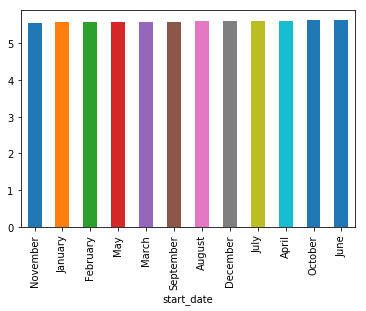

In [754]:
overall_month.plot(kind='bar')

In [707]:
up_updated[up_updated['month'] == 1].sort_values('id_x').head()

,id_x,cycle_length_initial,period_length_initial,start_date,end_date,month,year
41,254,28,6,2016-01-01,2016-01-07,1,2016
21901,254,28,6,2016-01-27,2016-02-02,1,2016
28063,269,28,8,2016-01-04,2016-01-10,1,2016
13108,278,28,8,2018-01-02,2018-01-08,1,2018
17557,278,28,8,2019-01-23,2019-01-29,1,2019


#### Excepted Cycle Length Initial

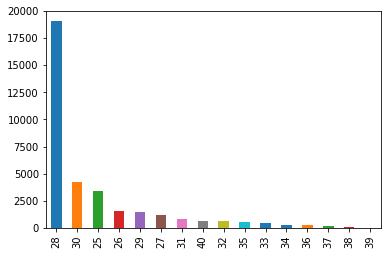

In [751]:
up_updated['cycle_length_initial'].value_counts().plot(kind='bar')

#### Expected period_length_initial

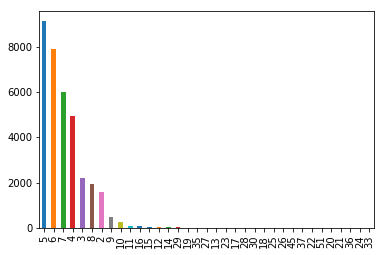

In [752]:
up_updated['period_length_initial'].value_counts().plot(kind='bar')

## Dimentionality Reduction

In [679]:
rogue = symt

In [681]:
rogue.drop(['id','date'],axis=1,inplace=True)

In [684]:
rogue.head()

,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore
0,252,0,0,0,0,0,0,0,0,0,0
1,257,0,0,0,46,0,0,0,0,0,0
2,257,0,0,0,0,0,27,48,0,0,0
3,263,0,0,0,0,0,0,0,0,0,0
4,269,0,0,0,0,0,0,0,0,0,0


In [737]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [738]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y = sc.fit_transform(y)

In [739]:
X = rogue['user_id']
y = rogue[rogue.columns[1:]]

In [740]:
X_pca = pca.fit_transform(y)

In [743]:
X_pca

array([[-50.0832884 ,   0.91727966],
       [-27.12741423, -31.906914  ],
       [-31.49000471,   9.1679533 ],
       ...,
       [  1.94059607, -18.71955608],
       [-35.58842767,  10.44274628],
       [-16.14851789, -47.6054414 ]])

In [741]:
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.74299925 0.25700075]
